In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

## <span style='color:Black'> Setting parameters  </span>

In [2]:
nb_nuisance_values = 21
nb_events_of_each = 50
nb_events = nb_nuisance_values*nb_events_of_each
test_size = 0.25
Z = [n*np.pi/(2*(nb_nuisance_values-1)) for n in range(0,nb_nuisance_values)]

## <span style='color:Black'> Generating & plotting events  </span>

In [3]:
DS = np.random.multivariate_normal([1,0],[[0.7,0],[0,0.7]],nb_events)
DB = np.random.multivariate_normal([-1,0],[[0.7,0],[0,0.7]],nb_events)
for k in range(1,nb_nuisance_values) :
    DS = np.concatenate((DS, np.random.multivariate_normal([np.cos(Z[k]),np.sin(Z[k])],[[0.7,0],[0,0.7]],nb_events)))
    DB = np.concatenate((DB, np.random.multivariate_normal([-np.cos(Z[k]),-np.sin(Z[k])],[[0.7,0],[0,0.7]],nb_events)))

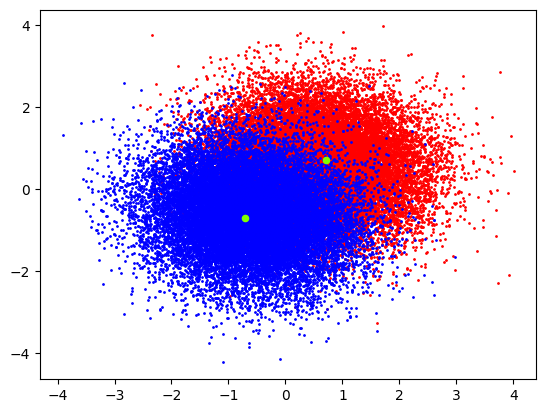

In [4]:
plt.scatter([a for (a,b) in DS], [b for (a,b) in DS], s = 1, c = "r")
plt.scatter([a for (a,b) in DB], [b for (a,b) in DB], s = 1, c = "b")
plt.scatter(np.cos(np.pi/4),np.sin(np.pi/4), s = 20, c ="chartreuse")
plt.scatter(-np.cos(np.pi/4),-np.sin(np.pi/4), s = 20, c ="chartreuse")

## <span style='color:Black'> Building dataframe  </span>

In [5]:
points = np.zeros((nb_events,3))
for k in range(int(nb_events/2)) :
    points[2*k][0] = DS[k][0]
    points[2*k][1] = DS[k][1]
    points[2*k][2] = 1
    points[2*k+1][0] = DB[k][0]
    points[2*k+1][1] = DB[k][1]
    points[2*k+1][2] = 0

In [6]:
df = pd.DataFrame(columns=["xs","ys","class"], data=points, index=range(nb_events))
df.head()

,xs,ys,class
0,0.720828,-0.521720,1.0
1,-1.002332,-0.795872,0.0
2,0.156608,0.094880,1.0
3,-1.249320,0.533520,0.0
4,0.881036,1.156021,1.0


In [7]:
train, test = train_test_split(df, test_size = test_size, shuffle = True)

## <span style='color:Black'> Trying useless strategy  </span>

Using the events from the train set, it computes the empirical average position of signal events (C_s) and the empirical average position of background events (C_b). Then for each events from the test set, it looks which wether the event is closer to C_s or C_b to attribute the label.

In [8]:
xms, yms = 0, 0 #C_x
xmb, ymb = 0, 0 #C_y
nbs, nbb = 0, 0 #Number of signal and background events
for i in range(int((1-test_size)*nb_events)) :
    x,y,c = train.iloc[i]
    if c == 1 :
        xms += x
        yms += y
        nbs += 1
    else : 
        xmb += x
        ymb += y
        nbb += 1
xms, yms, xmb, ymb = xms/nbs, yms/nbs, xmb/nbb, ymb/nbb
print(xms, yms, xmb, ymb)

0.9993447012451414 0.0857223363999996 -1.047290796857403 0.004543226967756868


In [9]:
def dist (x1,y1,x2,y2) :
    return ((x1-x2)**2+(y1-y2)**2)**0.5

In [10]:
def label (x,y) :
    dists = dist (x,y,xms,yms)
    distb = dist (x,y,xmb,ymb)
    if dists<distb :
        return 1
    return 0

In [11]:
def score (test_set) :
    n = test_set.size/3
    correct_ones = 0
    for k in range(int(n)) :
        (x,y,c) = test_set.iloc[k]
        predicted_c = label(x,y)
        if predicted_c == c :
            correct_ones += 1
    return correct_ones/n

In [12]:
score(test)

0.870722433460076